<a href="https://colab.research.google.com/github/Seiko-5/Corporaci-n-Favorita-Grocery-Sales-Forecasting---Kaggle/blob/main/Corporaci%C3%B3n_Favorita_Grocery_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 . Loading Libraries

In [ ]:
#This is to remove warnings provided by the python libraries

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For Tree map visualisations
pip install squarify

In [ ]:
# Install python library for partial dependence plot toolbox
!pip install pdpbox 

In [ ]:
# Install python library for SHAP explainer toolbox
!pip install shap

In [ ]:
# Import libaries
import pandas as pd
from tqdm import tqdm
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import squarify # for Tree map
import plotly.graph_objects as go
import plotly.offline as py

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor 

# PDP and Ice Plot
from pdpbox import pdp

# import shap library
import shap


# 02 . Inspecting Data Set (Store Data)

In [ ]:
# Load store data

df_stores = pd.read_csv('stores.csv')

In [ ]:
# Inspecting the contend of the data set 

print(df_stores.keys()) 

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [ ]:
# Data set's information

df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [ ]:
## Inspect the data set's 1st rows

df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
# Inspect the data set's last rows

df_stores.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [ ]:
# Multiple statistics for cluster columns using .agg funtion.

df_stores[['cluster']].agg(['min','max'])

,cluster
min,1
max,17


In [ ]:
# Mode value of the cluster variable.

df_stores.loc[:,"cluster"].mode()

0    3
dtype: int64

According to the above results, there are 17 grouping of similar stores and mejority of the stores in the 3rd clustor. 

# 03 . Inspecting Missing Values (Store Data)




In [ ]:
# Count all missing values in a DataFrame (both columns & Rows)

df_stores.isnull().sum().sum()

0

In [ ]:
# Count total missing values at each column in DataFrame

df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

# 04 . Visualization (Store Data)

In [ ]:
# # Number of Stores by States

df_stores['state'].value_counts()


Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
El Oro                             2
Tungurahua                         2
Cotopaxi                           2
Los Rios                           2
Bolivar                            1
Chimborazo                         1
Santa Elena                        1
Loja                               1
Pastaza                            1
Esmeraldas                         1
Imbabura                           1
Name: state, dtype: int64

## Number of Stores by States

Text(0, 0.5, 'Count of Stores')

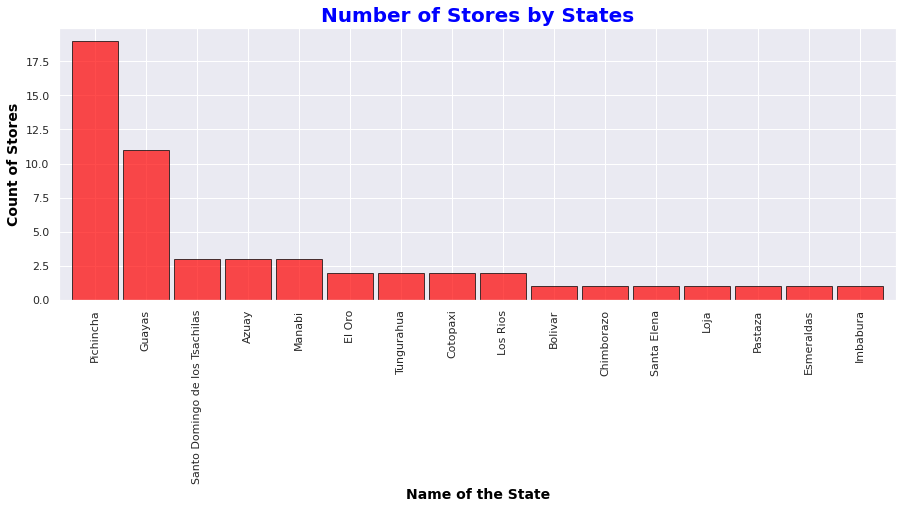

In [ ]:
# Number of Stores by States

plot01 = df_stores['state'].value_counts().plot(kind='bar',figsize=(15,5),
                                       color='red',alpha=0.7,
                                       width= 0.9,edgecolor = 'black')

plt.title ('Number of Stores by States', fontweight='bold', color = 'blue', fontsize='20', horizontalalignment='center') 
plt.xlabel('Name of the State', fontweight='bold', color = 'black', fontsize='14', horizontalalignment='center')
plt.ylabel('Count of Stores', fontweight='bold', color = 'black', fontsize='14')                                    

## Treemap of Store Counts Across Different States

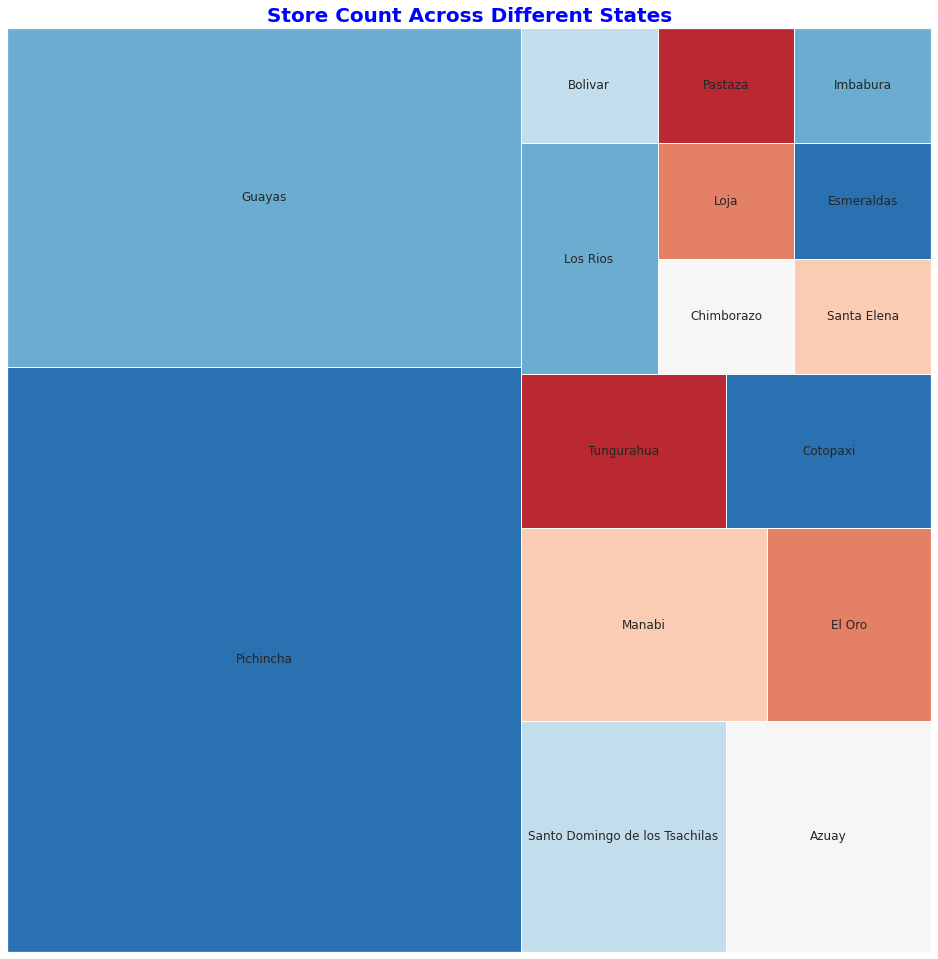

In [ ]:
# "Treemap of store counts across different States"

fig = plt.figure(figsize=(25, 21))
marrimeko=df_stores.state.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['state'].values,label=marrimeko.index,
              color=sns.color_palette("RdBu_r", 7), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(20,17)
plt.title("Store Count Across Different States",fontsize=20,fontweight='bold', color = 'blue')
plt.show()

## Treemap of Store Counts Across Different Cities

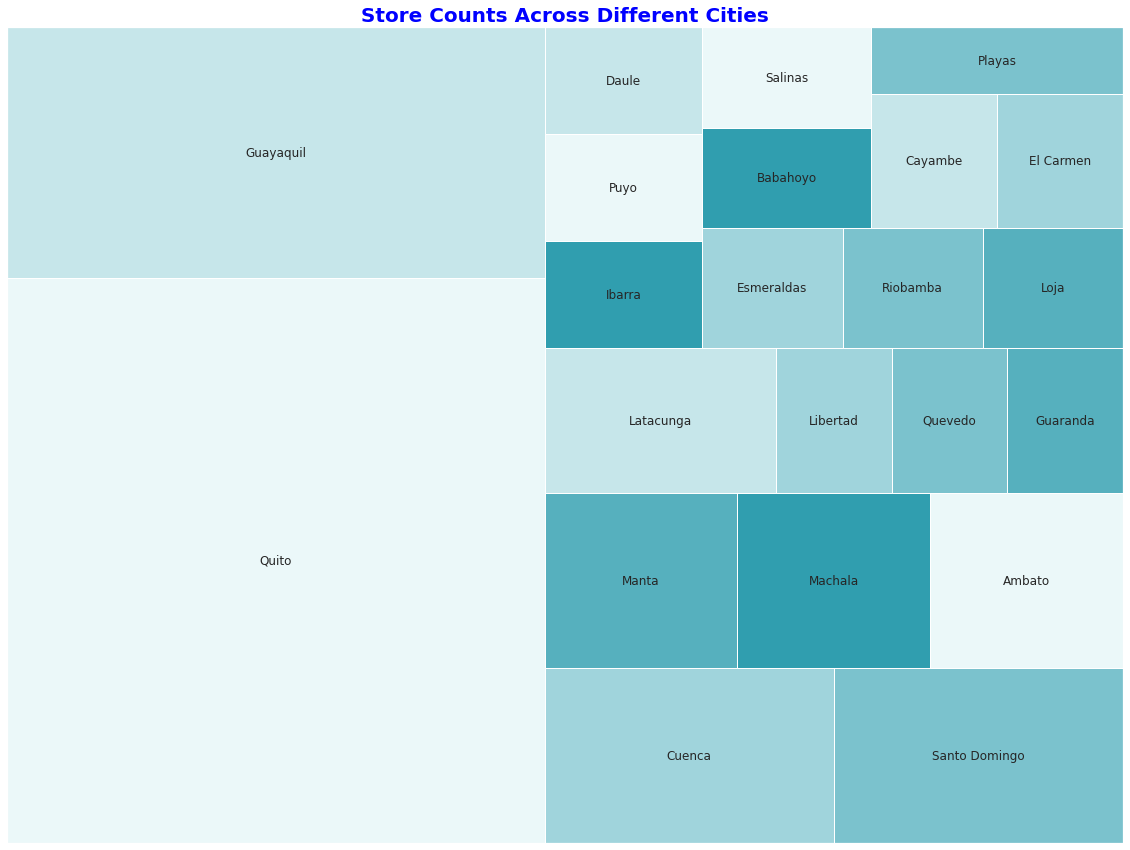

In [ ]:
# Treemap of Store Counts Across Different Cities

ig = plt.figure(figsize=(25, 21))
marrimeko=df_stores.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,
              color=sns.light_palette((210, 90, 60), input="husl"), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.title("Store Counts Across Different Cities", fontsize=20,fontweight='bold', color = 'blue')
plt.show();

## Heatmap of Store Numbers and the Clusters They Belong

Text(0.5, 111.5, 'Cluster')

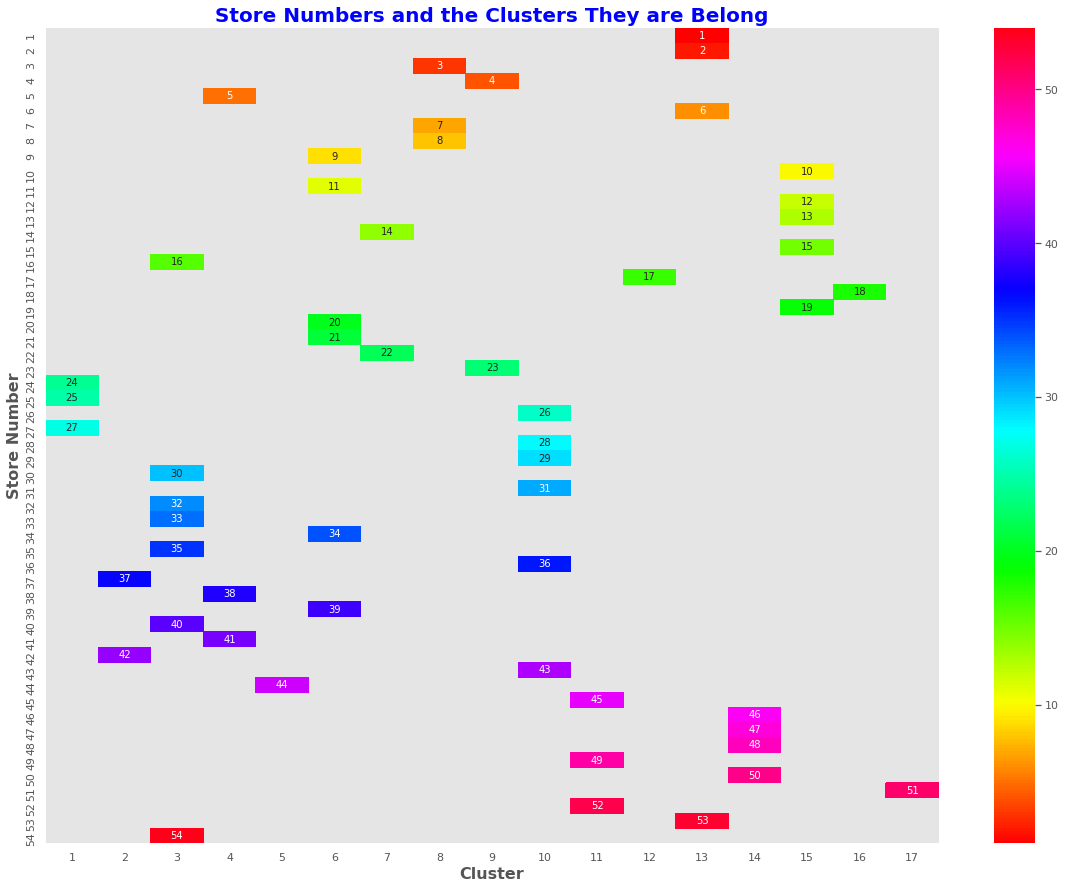

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(20,15))
store_pivot = df_stores.dropna().pivot("store_nbr","cluster", "store_nbr")
ax = sns.heatmap(store_pivot, cmap='hsv', annot=True, linewidths=0, linecolor='white')

plt.title('Store Numbers and the Clusters They are Belong', fontsize=20,fontweight='bold', color = 'blue' )
plt.ylabel('Store Number', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=16, fontweight='bold')

## Count of Clusters in a Particular Store Type

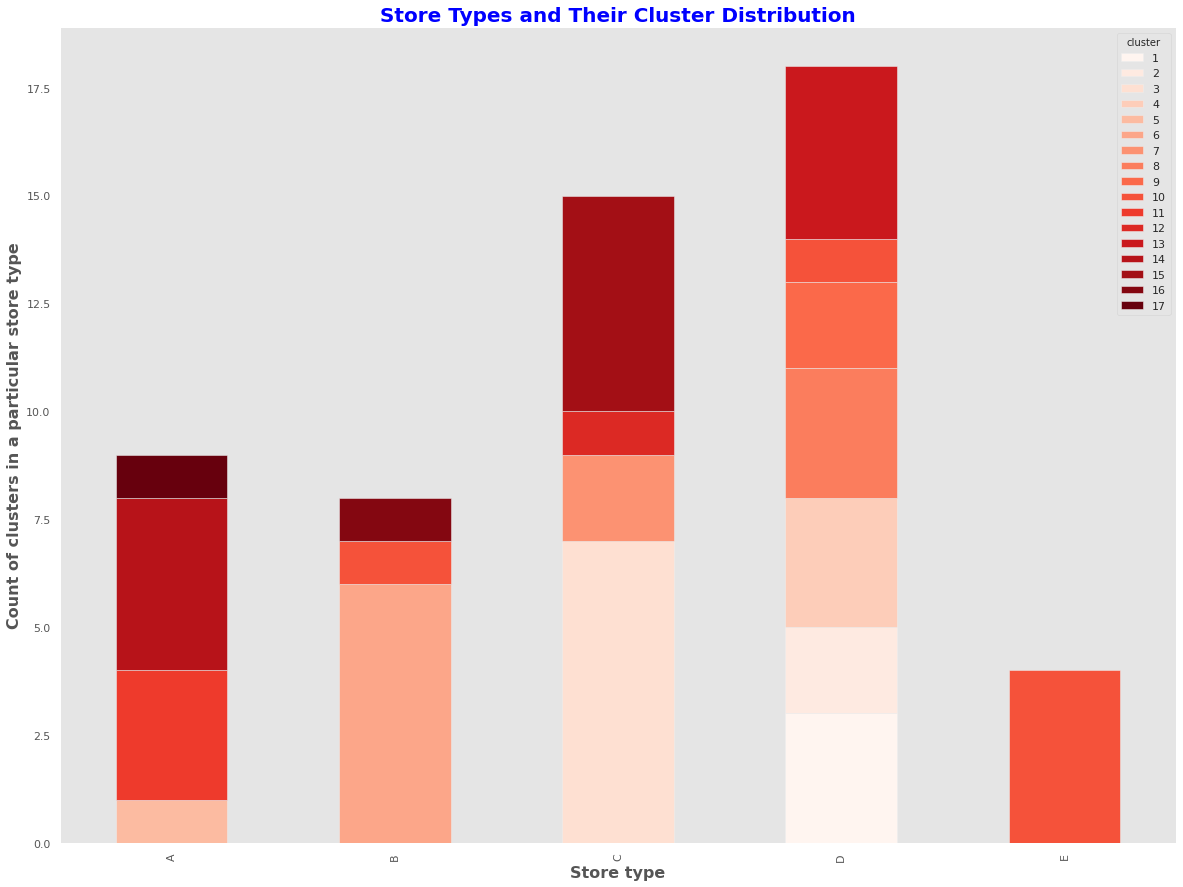

In [ ]:
plt.style.use('ggplot')

type_cluster = df_stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'Reds', figsize=(20,15),  grid=False)

plt.title('Store Types and Their Cluster Distribution', fontsize=20, fontweight='bold', color = 'blue')
plt.ylabel('Count of clusters in a particular store type', fontsize=16, fontweight='bold')
plt.xlabel('Store type', fontsize=16, fontweight='bold')
plt.show()

## Count of Stores For Cities

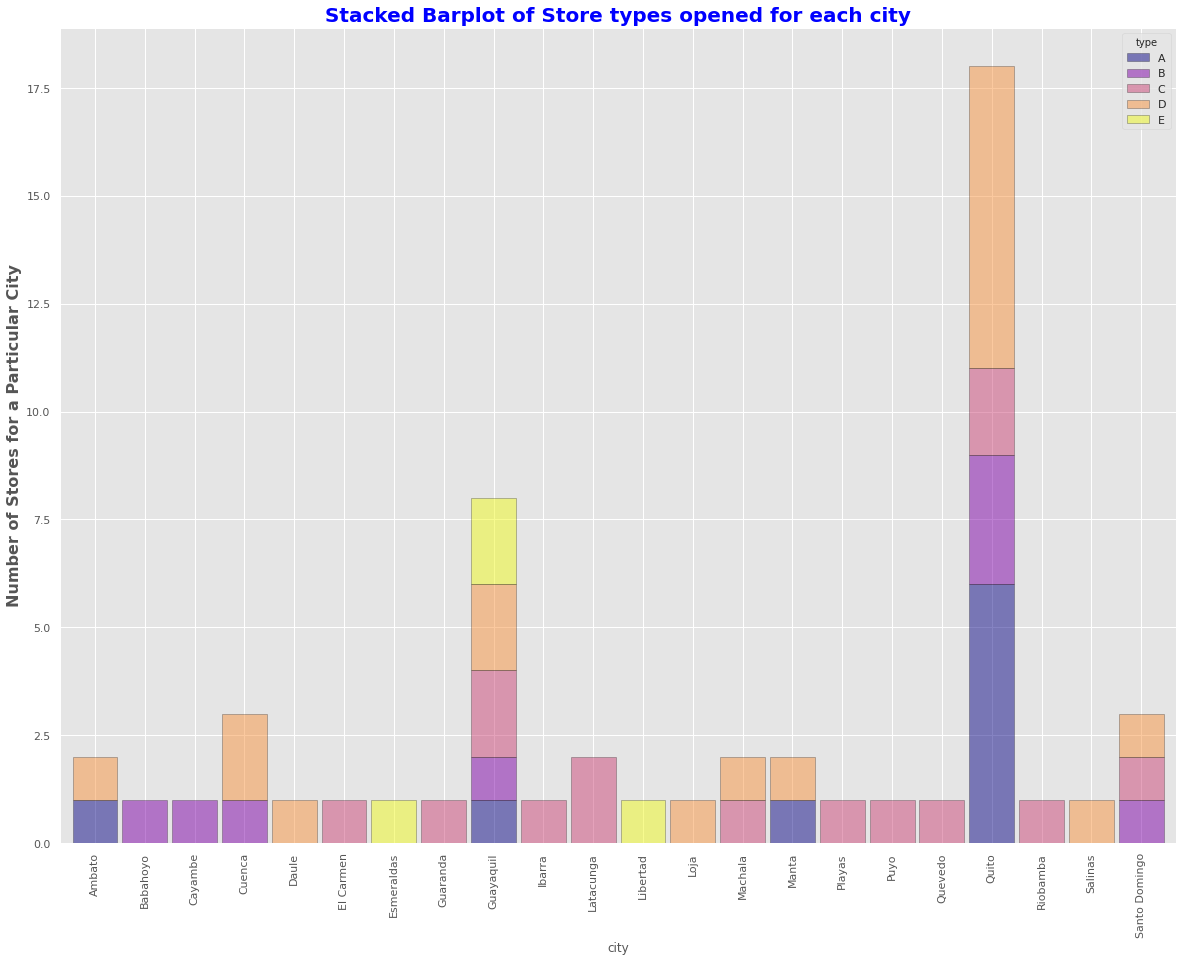

In [ ]:
plt.style.use('ggplot')

city_cluster = df_stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'plasma', figsize=(20,15), alpha=0.5,
                                       width= 0.9,edgecolor = 'black')

plt.title('Stacked Barplot of Store types opened for each city', fontsize=20, fontweight='bold', color = 'blue')
plt.ylabel('Number of Stores for a Particular City', fontsize=16, fontweight='bold')
plt.show()

# 05 . Inspecting Data Set (Transactions Data)

In [ ]:
# Import the Transcations data set

df_transaction = pd.read_csv('transactions.csv')

In [ ]:
# Inspecting the contend of the data set 

print(df_transaction.keys()) 

Index(['date', 'store_nbr', 'transactions'], dtype='object')


In [ ]:
# Data set's information

df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
## Inspect the data set's 1st rows

df_transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
# Inspect the data set's last rows

df_transaction.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


# 06 . Inspecting Missing Values (Transactions Data)




In [ ]:
# Count all missing values in a DataFrame (both columns & Rows)

df_transaction.isnull().sum().sum()

0

In [ ]:
# Count total missing values at each column in DataFrame

df_transaction.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

# 07 . Visualization (Transaction Data)

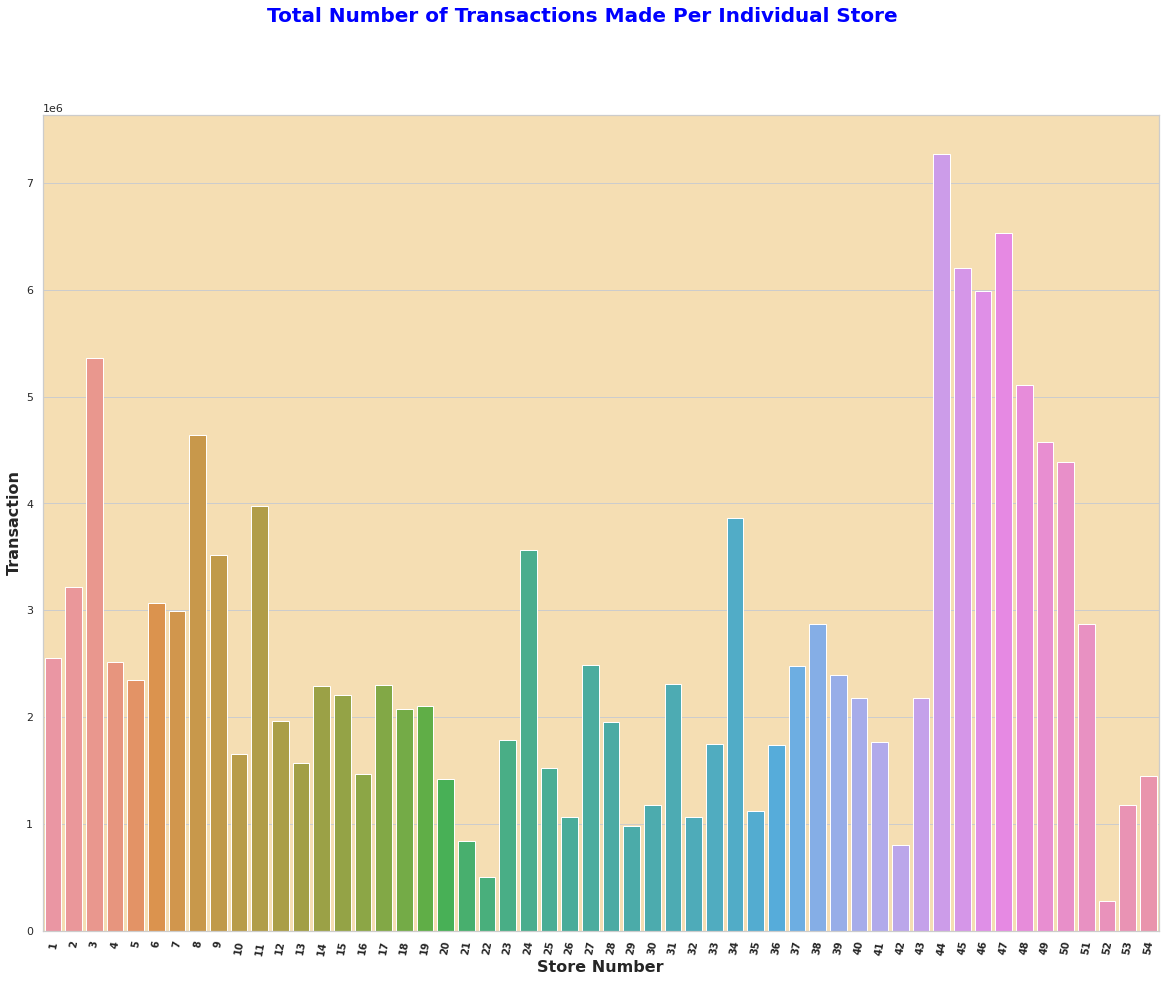

In [ ]:
# Distribution of total number of transactions made per individual store

pc = (df_transaction.groupby(['store_nbr']).sum())



fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
fig.suptitle('Total Number of Transactions Made Per Individual Store', fontsize=20, fontweight='bold', color = 'blue')

ax = sns.barplot(x = pc.index, y= "transactions", data = pc)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80, fontsize = 10, fontweight='bold')
ax.set_xlabel('Store Number',fontsize= 16, fontweight='bold')
ax.set_ylabel('Transaction',fontsize= 16, fontweight='bold')
ax.set_facecolor('wheat')



Below graph is another way of representing the above data for better visualization

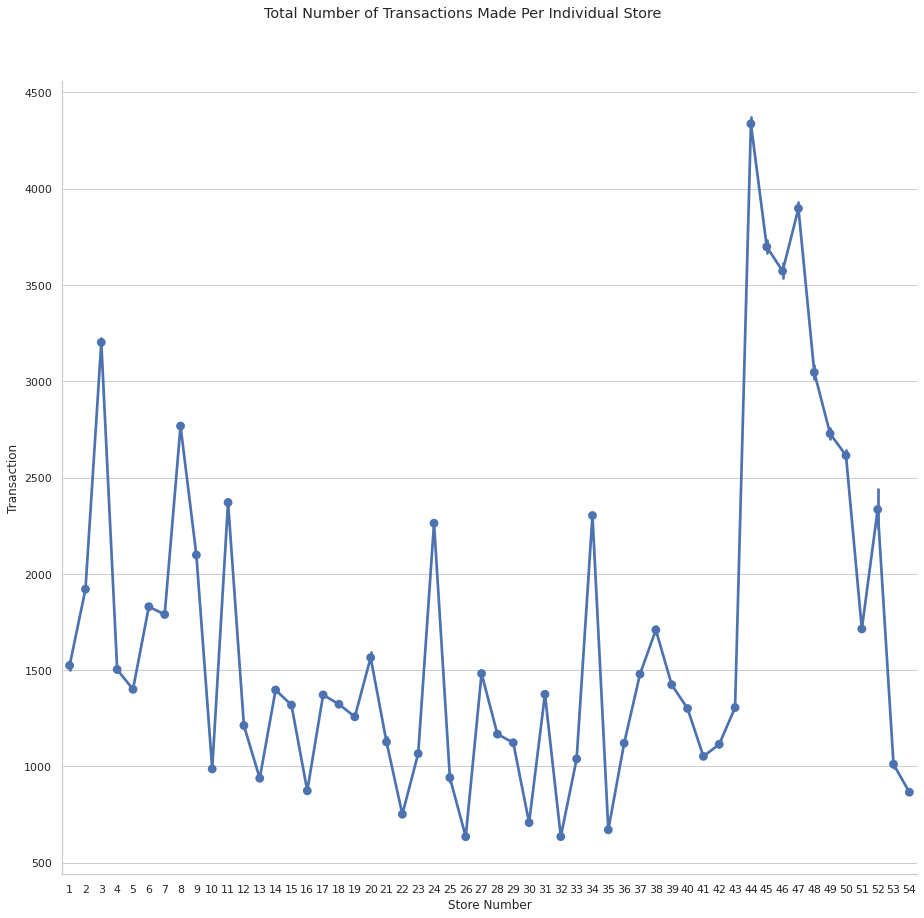

In [ ]:
g = sns.factorplot(x='store_nbr', y='transactions', size = 13, data=df_transaction)
g.set_axis_labels('Store Number', 'Transaction')
g.fig.suptitle('Total Number of Transactions Made Per Individual Store')
g.fig.subplots_adjust(top=0.9)

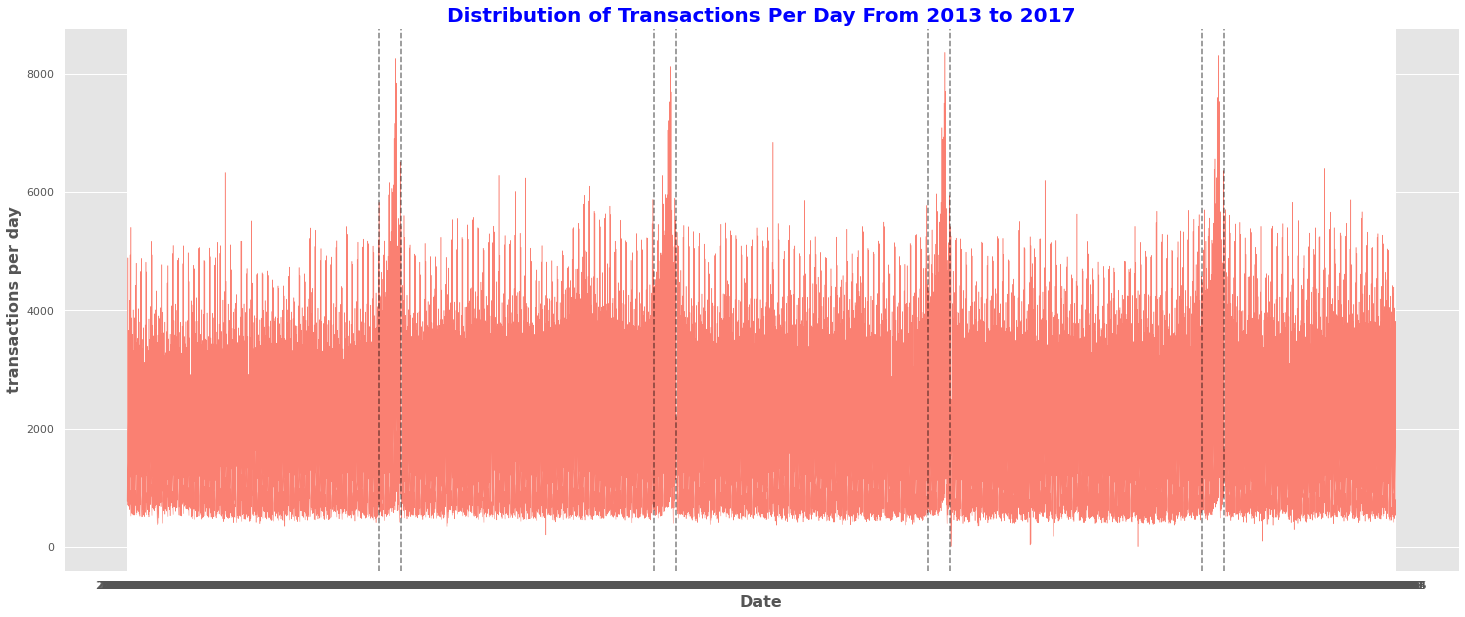

In [ ]:
# Distribution of transactions per day from 2013 till 2017

plt.style.use('ggplot')
plt.figure(figsize=(25,10))
plt.plot(df_transaction.date.values,df_transaction.transactions.values,  color='salmon',linewidth=0.5)

plt.axvline(x='2014-12-01',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2013-12-01',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2015-12-01',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2016-12-01',color='black',alpha=0.5,linestyle= '--')

plt.axvline(x='2014-12-31',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2013-12-31',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2015-12-31',color='black',alpha=0.5,linestyle= '--')
plt.axvline(x='2016-12-31',color='black',alpha=0.5,linestyle= '--')

plt.title("Distribution of Transactions Per Day From 2013 to 2017", fontsize=20, fontweight='bold', color = 'blue')
plt.ylabel('transactions per day', fontsize= 16, fontweight='bold')
plt.xlabel('Date', fontsize= 16, fontweight='bold')
plt.show()

# 08 . Inspecting Data Set (Items Data)

In [ ]:
# Load store data
df_items = pd.read_csv('items.csv')

In [ ]:
# Inspecting the contend of the data set 

print(df_items.keys()) 

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')


In [ ]:
# Data set's information

df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [ ]:
## Inspect the data set's 1st rows

df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


# 09 . Inspecting Missing Values (Item Data)




In [ ]:
# Count all missing values in a DataFrame (both columns & Rows)

df_items.isnull().sum().sum()

0

In [ ]:
# Count total missing values at each column in DataFrame

df_items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

# 10 . Visualization (Item Data)

In [ ]:
# Family Category's Count of Items

x, y = (list(x) for x in zip(*sorted(zip(df_items.family.value_counts().index, 
                                         df_items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y=df_items.family.value_counts().values,
    x=df_items.family.value_counts().index,
    marker=dict(
        color=df_items.family.value_counts().values,
        colorscale = 'Inferno',
        reversescale = False
    ),
    orientation='v',
)

layout = dict(
    title='Family Category\'s Count of Items',
     width = 1300, height = 800,
    yaxis=dict(
        showticklabels=True,

    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')



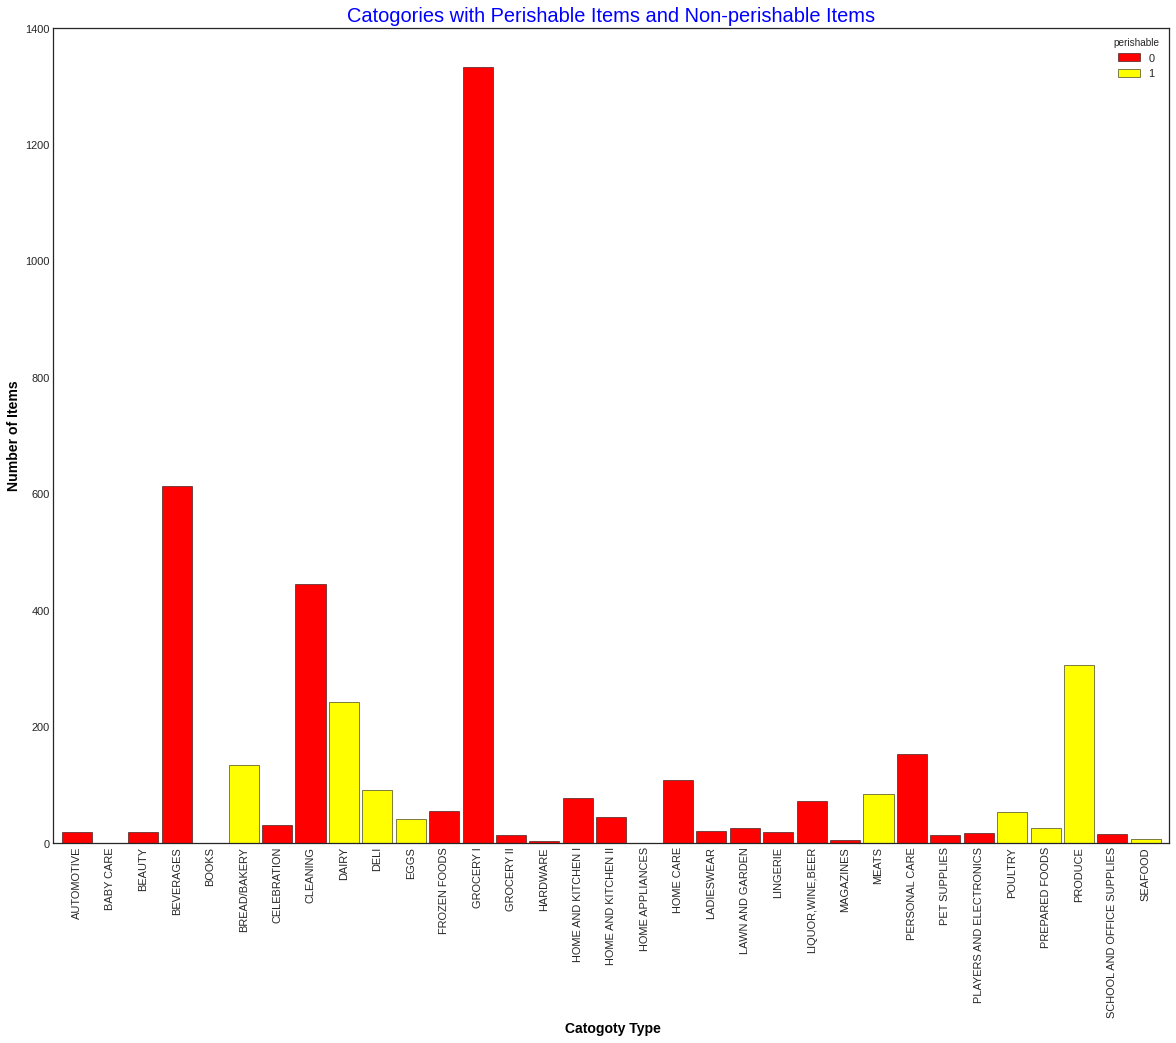

In [ ]:
# Catogories with Perishable Items and Non-perishable Items

plt.style.use('seaborn-white')
fam_perishable = df_items.groupby(['family', 'perishable']).size()
fam_perishable.unstack().plot(kind='bar',stacked=True, colormap= 'autumn', figsize=(20,15),
                              width= 0.9,edgecolor = 'black')

plt.title('Catogories with Perishable Items and Non-perishable Items',
          color = 'blue', fontsize='20', horizontalalignment='center')
plt.ylabel('Number of Items', fontweight='bold', color = 'black', fontsize='14')
plt.xlabel(' Catogoty Type',fontweight='bold', color = 'black', fontsize='14')
plt.show()

 # 11 . Inspecting Data Set (Oil Data)

In [ ]:
# Load store data

df_oil = pd.read_csv('oil.csv')

In [ ]:
# Inspecting the contend of the data set 

print(df_oil.keys()) 

Index(['date', 'dcoilwtico'], dtype='object')


In [ ]:
# Data set's information

df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
## Inspect the data set's 1st rows

df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


# 12 . Inspecting Missing Value (Oil Data)

In [ ]:
# Count all missing values in a DataFrame (both columns & Rows)

df_oil.isnull().sum().sum()

43

In [ ]:
# Count total missing values at each column in DataFrame

df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
# Replacing missing value with 0

df_oil['dcoilwtico'].fillna(0,inplace= True)

# 13 . Visualization (Oil Data)

In [ ]:
 plot = go.Scatter(x=df_oil['date'], y=df_oil['dcoilwtico'].dropna(),mode='lines',line=dict(color='black'),
fillcolor='salmon',fill='tonexty' )

data = [plot]

layout = go.Layout(yaxis=dict(title='Oil P rice'), 
title='Daily oil prices from January 2013 till August 2017',
showlegend = False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-time-series-error-bars')


# 14 . Pichincha and Guayas States

After the above visualization it is clear that Pichincha & Guayas States and Quito & Guayaquil cities have the highest number of outlets in the country.

In [ ]:
# Creating separate data frames for the Pichincha and Guayas States

df1 = df_stores.loc[df_stores['state']=='Pichincha'] 
df2 = df_stores.loc[df_stores['state']=='Guayas']

In [ ]:
# Changing the index

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Count of Stores')

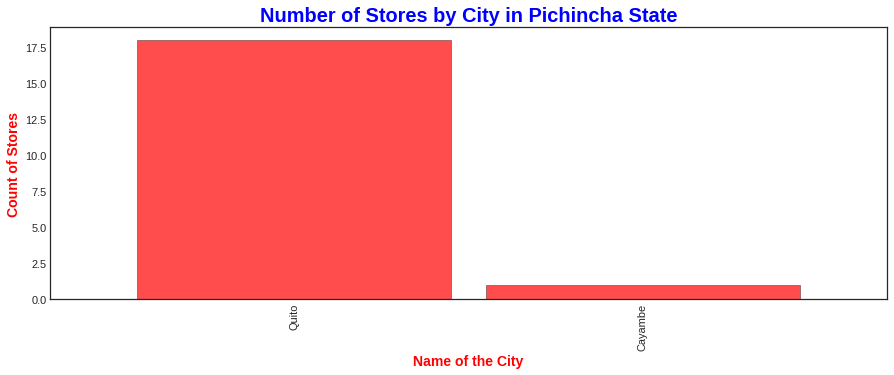

In [ ]:
# Number of Stores by City in Pichincha State

plot02 = df1['city'].value_counts().plot(kind='bar',figsize=(15,5),
                                       color='red',alpha=0.7,
                                       width= 0.9,edgecolor = 'black')

plt.title ('Number of Stores by City in Pichincha State', fontweight='bold', color = 'blue', fontsize='20', horizontalalignment='center') 
plt.xlabel('Name of the City', fontweight='bold', color = 'red', fontsize='14', horizontalalignment='center')
plt.ylabel('Count of Stores', fontweight='bold', color = 'red', fontsize='14') 

Text(0, 0.5, 'Count of Stores')

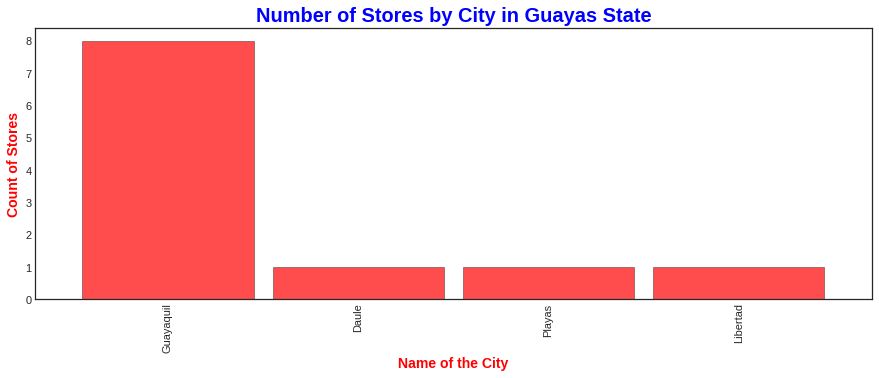

In [ ]:
# Number of Stores by City in Guayas State

plot03 = df2['city'].value_counts().plot(kind='bar',figsize=(15,5),
                                       color='red',alpha=0.7,
                                       width= 0.9,edgecolor = 'black')

plt.title ('Number of Stores by City in Guayas State', fontweight='bold', color = 'blue', fontsize='20', horizontalalignment='center') 
plt.xlabel('Name of the City', fontweight='bold', color = 'red', fontsize='14', horizontalalignment='center')
plt.ylabel('Count of Stores', fontweight='bold', color = 'red', fontsize='14') 

Quito and Guayaquil Cities have the most number of outlets. For the analysis store numbers of Quito and Guayaquil Cities were taken

In [ ]:
# Store numbers of Quito City

df1=df1.loc[df1['city']=='Quito'] 
df1.reset_index(drop=True, inplace=True)
df1

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,6,Quito,Pichincha,D,13
5,7,Quito,Pichincha,D,8
6,8,Quito,Pichincha,D,8
7,9,Quito,Pichincha,B,6
8,10,Quito,Pichincha,C,15
9,17,Quito,Pichincha,C,12


In [ ]:
# Store numbers of Guayaquil City

df2=df2.loc[df2['city']=='Guayaquil'] 
df2.reset_index(drop=True, inplace=True)
df2

,store_nbr,city,state,type,cluster
0,24,Guayaquil,Guayas,D,1
1,26,Guayaquil,Guayas,D,10
2,28,Guayaquil,Guayas,E,10
3,29,Guayaquil,Guayas,E,10
4,30,Guayaquil,Guayas,C,3
5,32,Guayaquil,Guayas,C,3
6,34,Guayaquil,Guayas,B,6
7,51,Guayaquil,Guayas,A,17


# 15 . Identifying the Top 2 and Bottom 2 Revnue Genarated Outlets of Quito and Guayaquil Cities.

Top Revanue Genarated Stores in the Cities

 Quito City

In [ ]:
# Selecting the stores in the Quito city

df3 = df_transaction[df_transaction['store_nbr'].isin([1,2,3,4,6,7,8,9,10,17,18,20,44,45,46,47,48,49])]

In [ ]:
# Guayaquil city's stores with tototal revanue

df3 = df3.groupby('store_nbr').transactions.apply(sum).to_frame().reset_index() 
df3


,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,6,3065896
5,7,2995993
6,8,4637971
7,9,3516162
8,10,1652493
9,17,2295485


Text(0, 0.5, 'Transaction')

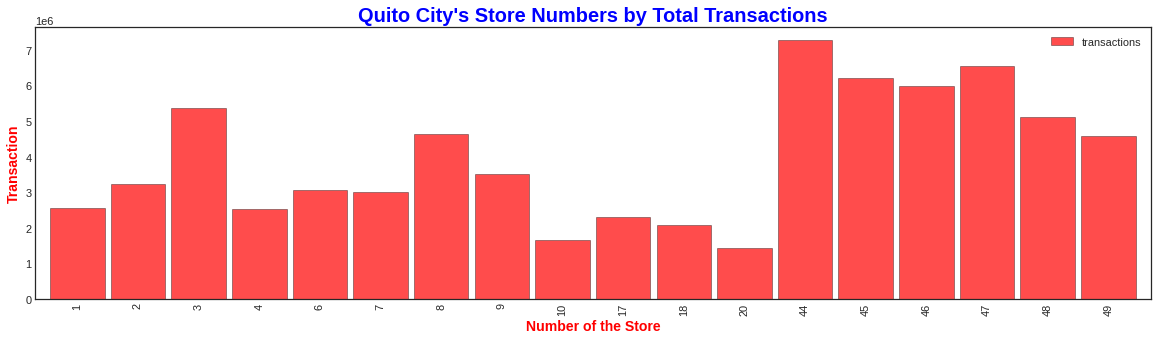

In [ ]:
# Ploting Quito City's Store Numbers by Total Transactions

plot04 = df3.plot(x='store_nbr',y='transactions',kind='bar',figsize=(20,5),
                                       color='red',alpha=0.7,
                                       width= 0.9,edgecolor = 'black')

plt.title ('Quito City\'s Store Numbers by Total Transactions', fontweight='bold', color = 'blue', fontsize='20', horizontalalignment='center') 
plt.xlabel('Number of the Store', fontweight='bold', color = 'red', fontsize='14', horizontalalignment='center')
plt.ylabel('Transaction', fontweight='bold', color = 'red', fontsize='14') 



In [ ]:
# Top 2 Revenue Genarated Stores

df3.nlargest(2, ['transactions']) 


,store_nbr,transactions
12,44,7273093
15,47,6535810


In [ ]:
# Least 2 Revenue Genarated Stores

df3_bottom2 = df3.nsmallest(2, ['transactions'])
df3_bottom2


,store_nbr,transactions
11,20,1422539
8,10,1652493


Guayaquil City

In [ ]:
# Selecting the stores in the Guayaquil city

df4 = df_transaction[df_transaction['store_nbr'].isin([24,26,28,29,30,32,34,51])]

In [ ]:
# Guayaquil city's stores with tototal revanue

df4 = df4.groupby('store_nbr').transactions.apply(sum).to_frame().reset_index() 
df4


,store_nbr,transactions
0,24,3568206
1,26,1065059
2,28,1957594
3,29,981448
4,30,1171130
5,32,1065226
6,34,3864018
7,51,2873614


Text(0, 0.5, 'Transaction')

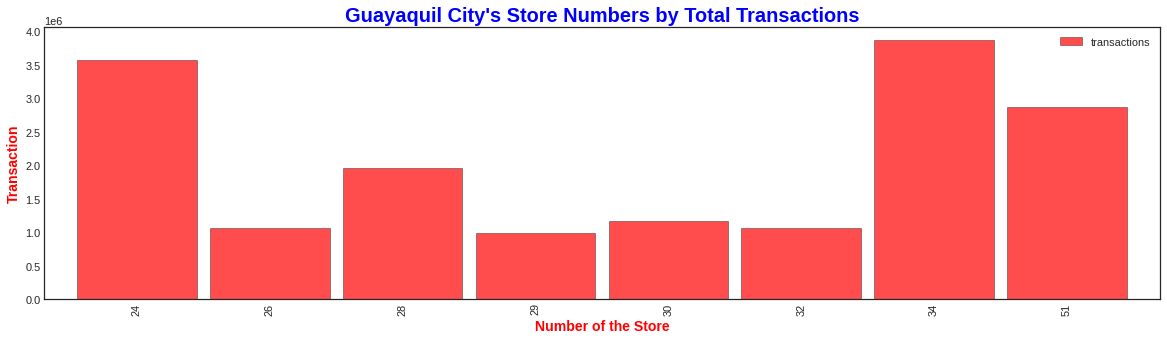

In [ ]:
# Ploting Guayaquil City's Store Numbers by Total Transactions

plot05 = df4.plot(x='store_nbr',y='transactions',kind='bar',figsize=(20,5),
                                       color='red',alpha=0.7,
                                       width= 0.9,edgecolor = 'black')

plt.title ('Guayaquil City\'s Store Numbers by Total Transactions', fontweight='bold', color = 'blue', fontsize='20', horizontalalignment='center') 
plt.xlabel('Number of the Store', fontweight='bold', color = 'red', fontsize='14', horizontalalignment='center')
plt.ylabel('Transaction', fontweight='bold', color = 'red', fontsize='14') 

In [ ]:
# Top 2 Revenue Genarated Stores

df4.nlargest(2, ['transactions']) 

,store_nbr,transactions
6,34,3864018
0,24,3568206


In [ ]:
# Least 2 Revenue Genarated Stores

df4.nsmallest(2, ['transactions'])


,store_nbr,transactions
3,29,981448
1,26,1065059


# 16 . Ananlysis of Selected Store (Store Number 44)

After carefully analysing the Store, Transactional, Item data sets, We have narrow down our nanalysis to store number 44.

**Why we have selected this store?**

01. This store represents the states which has highest number of stores.
02. This store represents the city which has the highest number of stores.
03. This store represents the highest revenue generated store.
04. This store represents the second highest populated city in Ecuador.  

In [ ]:
# Uploading the selected store's training data

df_store44 = pd.read_csv('train_store_44.csv')

In [ ]:
# Creating a data frame of unit Sales for Each Day in Store 44

df_store44 = df_store44.drop(columns=['store_nbr', 'item_nbr', 'onpromotion','id']).groupby(['date']).sum().reset_index()

In [ ]:
# Transactional Data for Store Number 44

df5 = df_transaction[df_transaction['store_nbr'].isin([44])].drop(columns=['store_nbr'])

In [ ]:
# Merging Transactional Data (store number 44) With Store Data (store number 44) & Oil Data  

df6 = pd.merge(df_store44, df5)
df_new44 = pd.merge(df_oil, df6)

For predictive analysis we choose target variable as Transactions

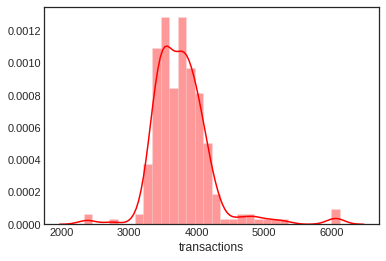

In [ ]:
# Let’s first plot the distribution of the target variable Transactions

sns.distplot(df_new44['transactions'], bins=(30), color="red", axlabel="transactions")  
plt.show()

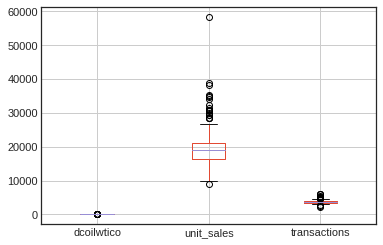

In [ ]:
# Create box plots See the outliyers

df_new44 .boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febc513bcf8>,
      dtype=object)

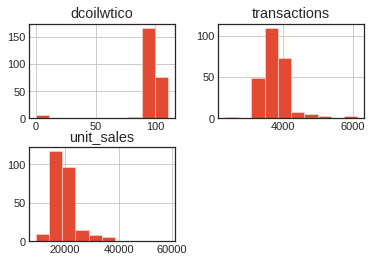

In [ ]:
# Visualize the data discribtion using pandas dataframe:

df_new44.hist()

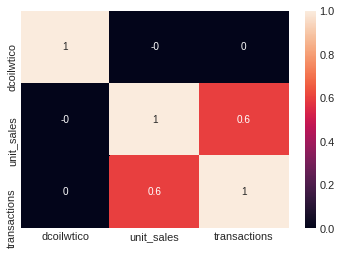

In [ ]:
# create a correlation matrix that measures the linear relationships between the variables. 

correlation_matrix = df_new44.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

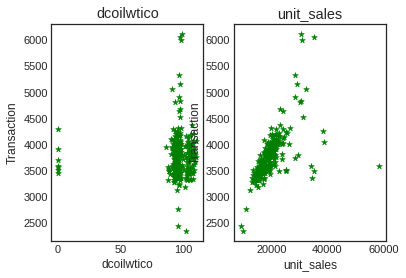

In [ ]:
# Using a scatter plot let’s see how these features vary with Transaction.

features = ['dcoilwtico', 'unit_sales']
target = df_new44['transactions']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_new44[col]
    y = target
    plt.scatter(x, y, marker='*',color="green")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Transaction')
  

plt.show()

# 17 . Pre-Processing and Feature Engineering The Selected Store Data

## Calculate Skewness for all the Continous Variables.

In [ ]:
# Determine index for continouse variables

cts_vars = df_new44 .dtypes[df_new44.dtypes != 'object'].index

In [ ]:
# Calculate the skewness and then sort

skew_vars = df_new44[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

unit_sales      2.662070
transactions    1.854890
dcoilwtico     -4.855543
dtype: float64


Ploting Skewness

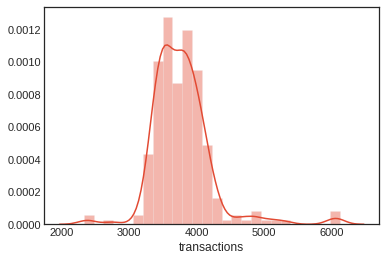

In [ ]:
sns.distplot(df_new44['transactions'])

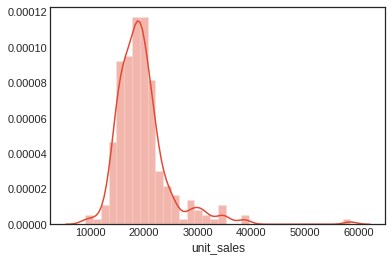

In [ ]:
sns.distplot(df_new44['unit_sales'])

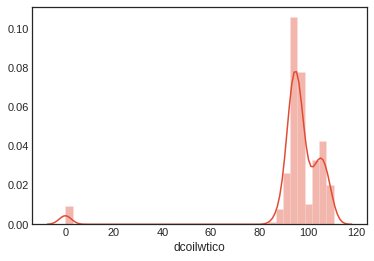

In [ ]:
sns.distplot(df_new44['dcoilwtico'])

## Change the Variable Names to Transformation

In [ ]:
transactions_var = df_new44['transactions']

In [ ]:
 unit_sales_var = df_new44['unit_sales']

In [ ]:
dcoilwtico_var = df_new44['dcoilwtico']

## Square Root Transformation.

In [ ]:
sqrt_transactions= transactions_var ** (1/2)

In [ ]:
 sqrt_unit_sales= unit_sales_var ** (1/2)

In [ ]:
sqrt_dcoilwtico = dcoilwtico_var ** (1/2)

### Visualisation of the Squre Root Transformation

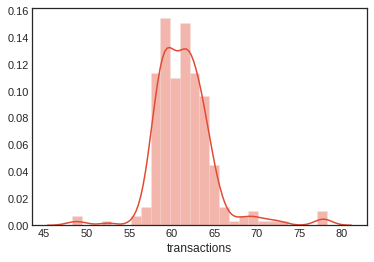

In [ ]:
sns.distplot(sqrt_transactions)

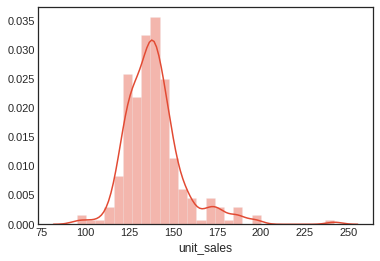

In [ ]:
sns.distplot(sqrt_unit_sales)

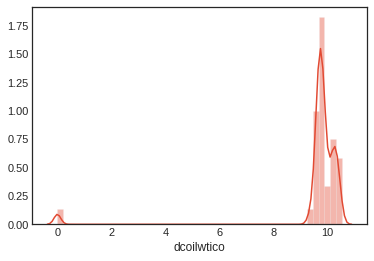

In [ ]:
sns.distplot(sqrt_dcoilwtico)

## Log Transformation

In [ ]:
log_transactions= np.log(transactions_var )

In [ ]:
log_unit_sales = np.log(unit_sales_var)

In [ ]:
log_dcoilwtico = np.log(dcoilwtico_var)

### Visualization of the Log Transfomation

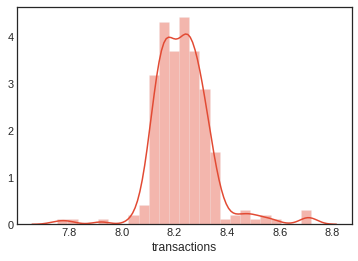

In [ ]:
sns.distplot(log_transactions)

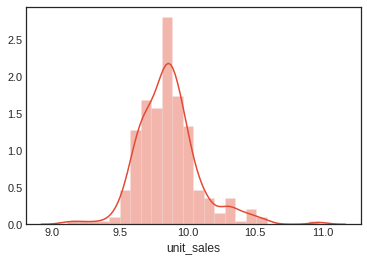

In [ ]:
sns.distplot(log_unit_sales)

In [ ]:
# sns.distplot(log_dcoilwtico)

#log value for this variable can't be ploted.

## Construct the New Variable

In [ ]:
df_new44['sqrt_transactions'] = sqrt_transactions

In [ ]:
df_new44['sqrt_unit_sales'] = sqrt_unit_sales

In [ ]:
df_new44['sqrt_dcoilwtico'] = sqrt_dcoilwtico

Deleting the original variable when using the dataframe as a predictor.

In [ ]:
#Deleting variables

del df_new44['transactions']
del df_new44['unit_sales']
del df_new44['dcoilwtico']

In [ ]:
# checking the variables

df_new44.keys()

Index(['date', 'sqrt_transactions', 'sqrt_unit_sales', 'sqrt_dcoilwtico'], dtype='object')

# 18 . Split the Data - Pre Processing and Featured Engineering Data

In [ ]:
# split the dataset into predictors (df_x) and target variable (df_y)
# split the dataset into predictors (df_x) and target variable (df_y)

df_x1 = df_new44[['sqrt_unit_sales', 'sqrt_dcoilwtico']]
df_y1 = df_new44[['sqrt_transactions']]

In [ ]:
X1_train, X1_val, Y1_train, Y1_val = train_test_split(df_x1, df_y1, test_size = 0.33, random_state = 10) 


# 19 . Regression, GBR and Neural Network 

## Linear Regression

### Linear Regression Modeling without Scaling/Standardization Data

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X1_train,Y1_train)
Y1_predict1 = reg.predict(X1_val)

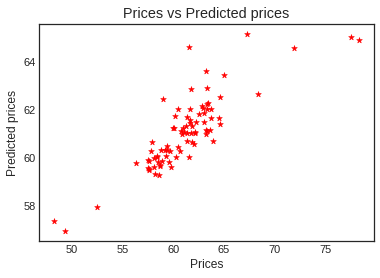

In [ ]:
plt.scatter(Y1_val, Y1_predict1, marker='*',color="red")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Calculate RMSE value using numpy funtion
error_1 = np.sqrt(mean_squared_error(Y1_val, Y1_predict1)) # From sklearn.metrics, mean_squared_error import
print('Root Mean Squared Error: ' + str(error_1))

Root Mean Squared Error: 3.0354243150976883


### Linear Regression Modeling with Scaling/Standardization Data

Analysing the Dispertion of the Variables(Features)

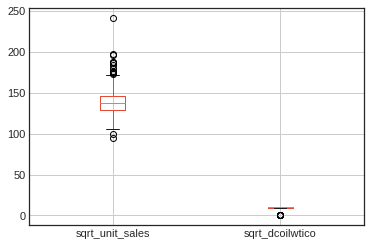

In [ ]:
# Box plot analysis
df_x1.boxplot()

Data dispersion is extremely different among different features. Thus, scaling/standardization is required.

#### Data Standardization

In [ ]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
df_x1_scaled = scaler.transform(df_x1)
df_x1_scaled = pd.DataFrame(df_x1_scaled, columns=df_x1.columns)

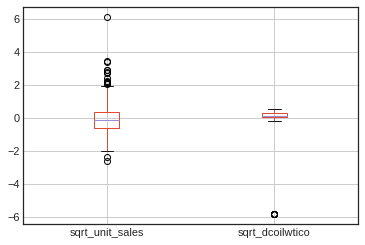

In [ ]:
# Show boxplot for scaled predictors
df_x1_scaled.boxplot()

#### Regression Modeling

In [ ]:
# Run the predictive model to see whether accuracy has improved.
X_train, X_val, Y_train, Y_val = train_test_split(df_x1_scaled, df_y1, test_size = 0.33, random_state = 10)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict2 = reg.predict(X_val)

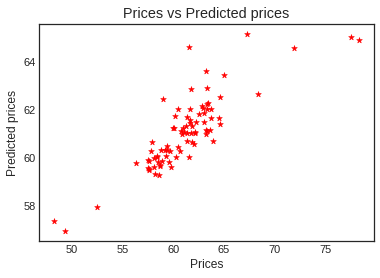

In [ ]:
plt.scatter(Y_val, Y_predict2,marker='*',color="red")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Calculate RMSE value using numpy funtion
error_2 = np.sqrt(mean_squared_error(Y_val, Y_predict2))
print('Root Mean Squared Error: ' + str(error_2))

Root Mean Squared Error: 3.0354243150976883


Attempt 1 (original data) RMSE: 3.0354243150976883

Attempt 2 (with scaling) RMSE: 3.0354243150976883
 
We do not see any significant difference in scaling in this case.

#### Correlation Analaysis

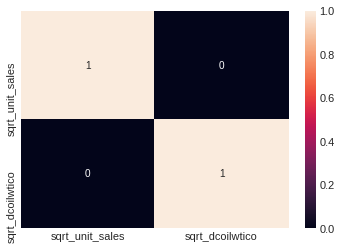

In [ ]:
# Correlation plot (method02)

correlation_matrix = df_x1_scaled.corr().round(1) # round is for rounding value
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Advanced Gradient Boosting Regression Model

In [ ]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train,Y_train)

# Predict
Y_predict3 = gbr_model.predict(X_val)

In [ ]:
# Calculate RMSE value using numpy funtion

error_3 = np.sqrt(mean_squared_error(Y_predict3, Y_val))
print('Validation Root Mean Squared Error (Gradient Boosting): ' + str(error_3))

Validation Root Mean Squared Error (Gradient Boosting): 2.634774726376926


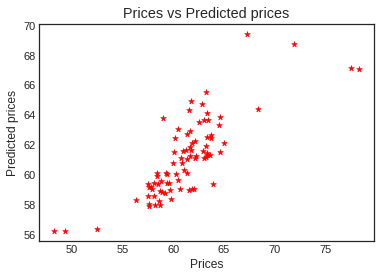

In [ ]:
plt.scatter(Y_val, Y_predict3,marker='*',color="red")
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Neural Networks

Model an advanced predictive model using standard neural network.

In [ ]:
mlp1 = MLPRegressor(hidden_layer_sizes=(600), max_iter=100000)


In [ ]:
mlp1.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=600, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
Y_predict4 = mlp1.predict(X_val)

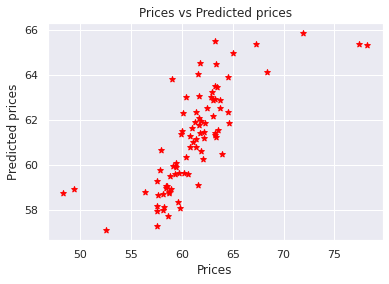

In [ ]:
#Plot the predicted values

plt.scatter(Y_val, Y_predict4, marker='*',color="red",)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Calculate RMSE value using numpy funtion
error_4 = np.sqrt(mean_squared_error(Y_val, Y_predict4))
print('Root Mean Squared Error: ' + str(error_4))

Root Mean Squared Error: 2.97348208206406


# 20 . Comparison of the 4 -- Root Mean Squared Error Values

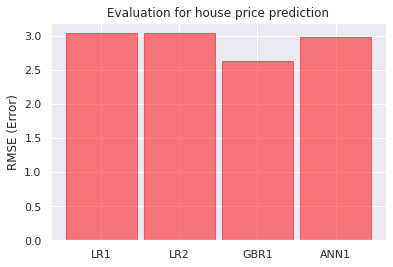

In [ ]:
models = ['LR1', 'LR2','GBR1', 'ANN1']
y_pos = np.arange(len(models))                             
performance = [error_1, error_2, error_3, error_4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='red', edgecolor = 'red', linewidth =1, width= 0.9)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Evaluation for house price prediction')
 
plt.show()

Gradient Boost Algorithm give the minimul Root Mean Squared Error and we will conduct the ananlysis further with consturted GBR.

# 21 . XAI (Explainable AI) Techniques & Frameworks

## Sensivity Analysis

The following function is created for the convinience to generate PDP plots and ICE plots

In [ ]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)

### Parcial Dependancy Plot

In [ ]:
from pdpbox import pdp

You selected sqrt_dcoilwtico


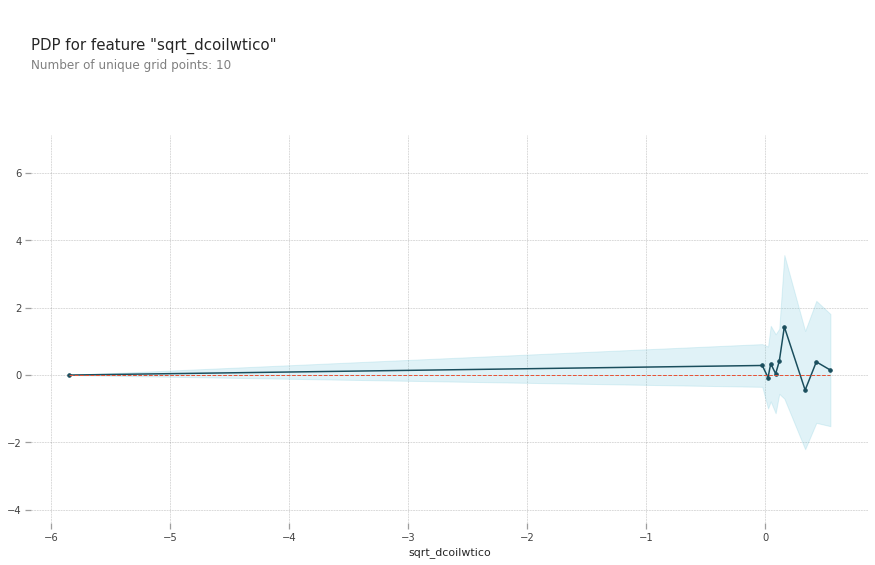

In [ ]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "sqrt_dcoilwtico" #@param ['sqrt_unit_sales','sqrt_dcoilwtico']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

###ICE Plots

You selected sqrt_dcoilwtico with 2 clusters.


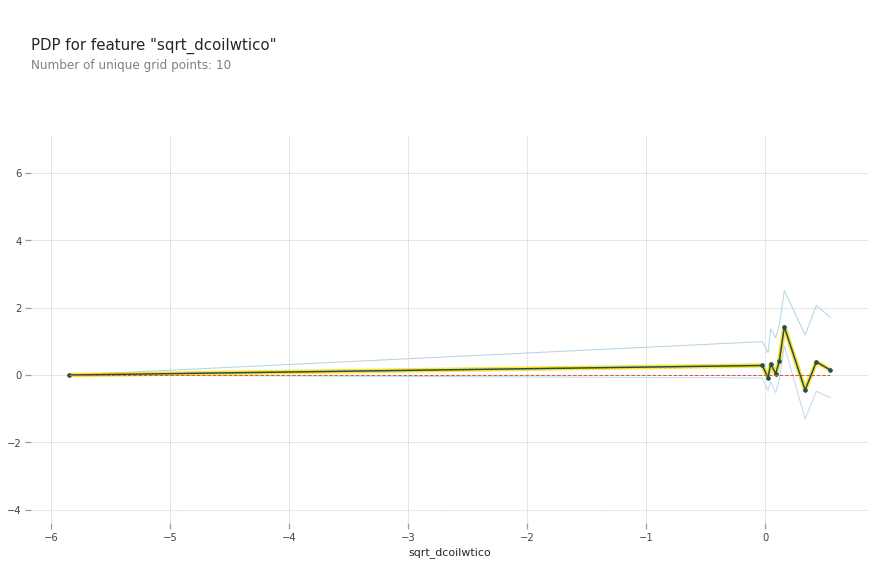

In [ ]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "sqrt_unit_sales" #@param ['sqrt_unit_sales', 'sqrt_dcoilwtico']
number_clusters = 3 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

# If you want to take all the data points number_clusters=x1_train.shape[0]

## SHAP Explainer

Create a shap explainer from gradient boosting model

In [ ]:
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_train)

Below method shows the individual recors' outcome to the model. Since we have lot of records we did not expain this in our report.

In [ ]:
record_id = 45

print('Actual values:')
print(X_train.iloc[record_id,:])

# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[record_id,:], X_train.iloc[record_id,:])

Actual values:
sqrt_unit_sales   -0.926000
sqrt_dcoilwtico    0.049664
Name: 101, dtype: float64


This expain the contribution of all the data records to the model.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. 

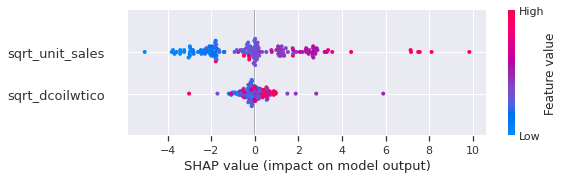

In [ ]:
# summarize the effects of all the features
shap.initjs()
shap.summary_plot(shap_values, X_train)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs).

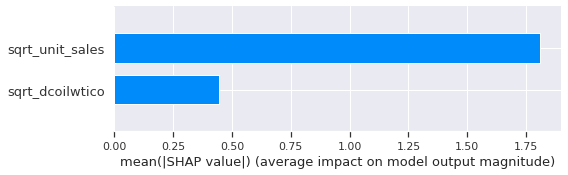

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")